In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math

## Question 1

In [29]:
N_array = [5, 10, 20, 40, 60, 80, 500, 10**3, 10**4]
mu_prior = 10.5
sigma_prior = 1
mu_true = 10
sigma_true = 4
M = 200
np.random.seed(100)

In [30]:
def mu_MLE_relError():
    listEstimate = []
    for j in N_array:
        errorList = []
        for i in range(M):
            data = np.random.normal(mu_true, sigma_true, (j,))
            mean = np.mean(data)
            error = abs(mean-mu_true)/mu_true
            errorList.append(error)
        listEstimate.append(errorList)
        errorList = []
    return listEstimate

In [31]:
error_mean_MLE = mu_MLE_relError()

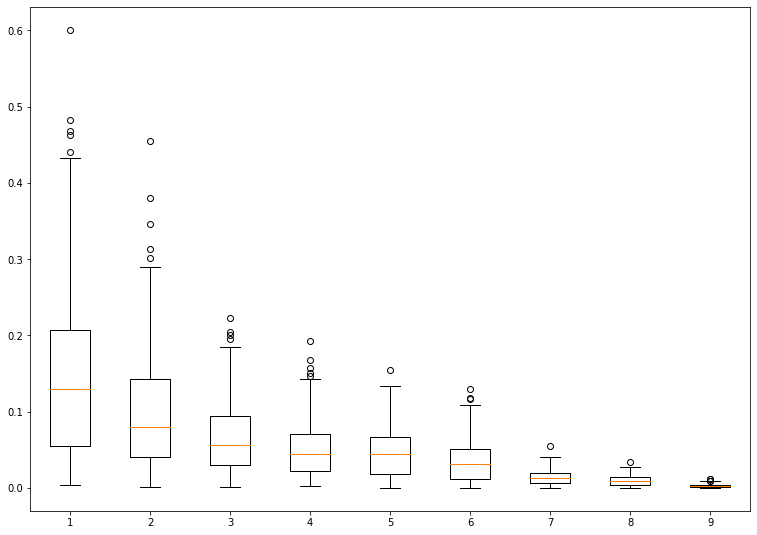

In [32]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(error_mean_MLE)
 
plt.show()

In [33]:
def mu_MAP_relError():
    listEstimate = []
    for j in N_array:
        errorList = []
        for i in range(M):
            data = np.random.normal(mu_true, sigma_true, (j,))
            mean = np.mean(data)
            mean_estimate = (mean*(sigma_prior**2) + mu_prior*((sigma_true**2)/j))/(sigma_prior + ((sigma_true**2)/j))
            error = abs(mean_estimate-mu_true)/mu_true
            errorList.append(error)
        listEstimate.append(errorList)
        errorList = []
    return listEstimate

In [34]:
error_mean_MAP1 = mu_MAP_relError() # For Gaussian Case

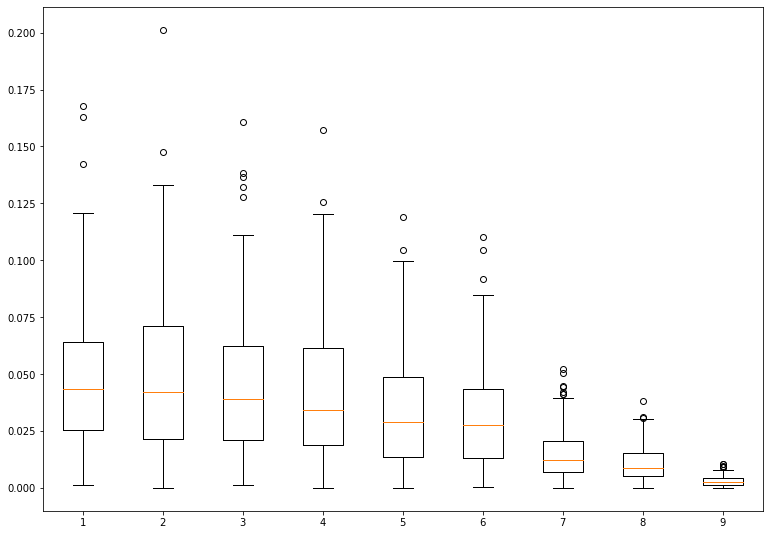

In [35]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot(error_mean_MAP1)

plt.show()

In [36]:
# Since the prior function is a constant probability function the posterior function would look like (likelihood*constant)/constant.
# Hence the maximum likelihood estimate will be same as MLE

def mu_MAP_uniform_prior_relError():
    listEstimate = []
    for j in N_array:
        errorList = []
        for i in range(M):
            data = np.random.normal(mu_true, sigma_true, (j,))
            mean = np.mean(data)
            if(mean < 9.5):
                mean = 9.5
            elif(mean > 11.5):
                mean = 11.5
            error = abs(mean-mu_true)/mu_true
            errorList.append(error)
        listEstimate.append(errorList)
        errorList = []
    return listEstimate

In [37]:
error_mean_MAP2 = mu_MAP_uniform_prior_relError() # For Gaussian Case

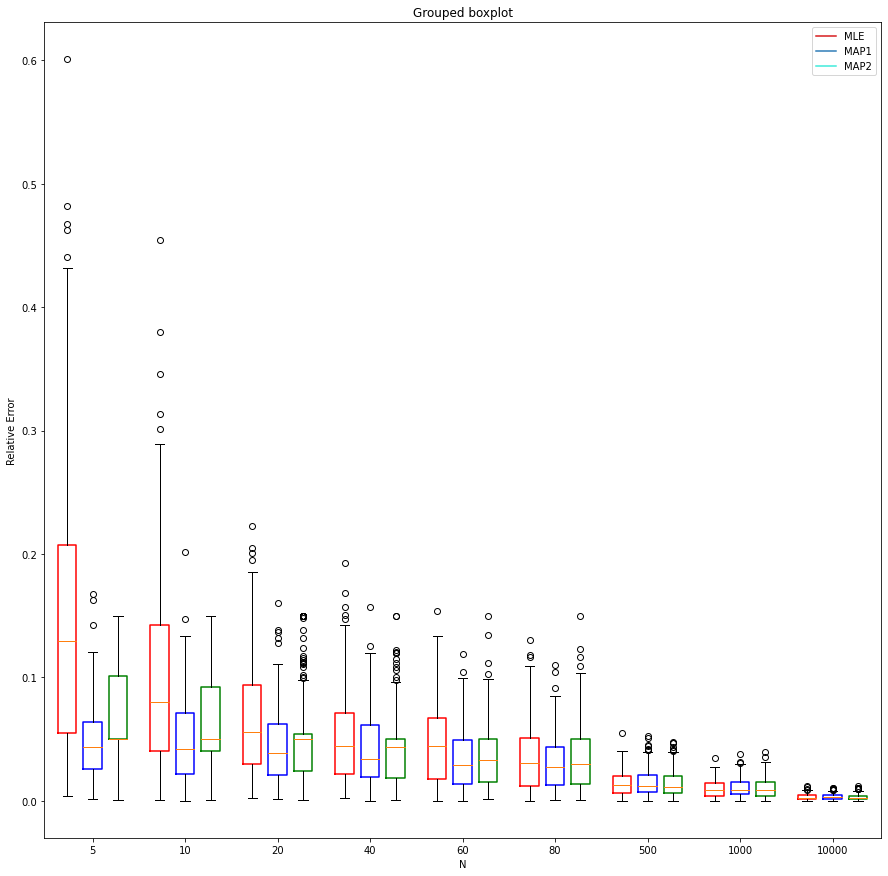

In [51]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set the figure size
# plt.rcParams["figure.figsize"] = [7.00, 3.50]
# plt.rcParams["figure.autolayout"] = True

# # Import a Seaborn dataset
# data = 

# # Create a grouped boxplot
# sns.boxplot(x=N_array, y=, hue=data['sex'])

# plt.show()

plt.figure(figsize=(15, 15))

pl1 = plt.boxplot(error_mean_MLE, positions=np.array(np.arange(len(error_mean_MLE)))*2 - 0.55, widths=0.4)
pl2 = plt.boxplot(error_mean_MAP1, positions=np.array(np.arange(len(error_mean_MAP1)))*2, widths=0.4)
pl3 = plt.boxplot(error_mean_MAP2, positions=np.array(np.arange(len(error_mean_MAP2)))*2 + 0.55, widths=0.4)

plt.setp(pl1['boxes'], color='red', linewidth=1.5)
plt.setp(pl2['boxes'], color='blue', linewidth=1.5)
plt.setp(pl3['boxes'], color='green', linewidth=1.5)

def define_box_properties(plot_name, color_code, label):
    # use plot function to draw a small line to name the legend.
    plt.plot([], c=color_code, label = label)
    plt.legend()


plt.xticks(np.array(range(len(N_array)))*2, N_array)

# setting colors for each groups
define_box_properties(pl1, '#D7191C', 'MLE')
define_box_properties(pl2, '#2C7BB6', 'MAP1')
define_box_properties(pl3, '#3DEADB', 'MAP2')


plt.xlabel('N')
plt.ylabel('Relative Error')
# set the limit for x axis
# plt.ylim(0, 0.61)
# set the limit for y axis
 
# set the title
plt.title('Grouped boxplot')
plt.show()